<a href="https://colab.research.google.com/github/vipashaaV321/User-Intent-Modeling/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math
import itertools

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')
movies = pd.read_csv('/content/movies.csv')
df_r = ratings.copy()
df_m = movies.copy()

In [ ]:
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate

In [ ]:
X = ratings.iloc[:,:2]
Y = ratings.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

In [ ]:
Y

0         2.5
1         3.0
2         3.0
3         2.0
4         4.0
         ... 
99999     2.5
100000    4.0
100001    4.0
100002    2.5
100003    3.5
Name: rating, Length: 100004, dtype: float64

# Regression

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate

# Assuming you have training data in the form of user indices and movie indices
user_indices = X['userId']  # List of user indices
movie_indices =X['movieId'] # List of movie indices
labels = Y # List of corresponding ratings

# Convert the data to NumPy arrays
user_indices = np.array(user_indices)
movie_indices = np.array(movie_indices)
labels = np.array(labels)

# Split the data into training and validation sets
train_size = int(0.8 * len(user_indices))  # 80% for training, 20% for validation
train_user_indices = user_indices[:train_size]
train_movie_indices = movie_indices[:train_size]
train_labels = labels[:train_size]

val_user_indices = user_indices[train_size:]
val_movie_indices = movie_indices[train_size:]
val_labels = labels[train_size:]

# Define the input dimensions
num_users = np.max(user_indices) + 1  # Number of unique users
num_movies = np.max(movie_indices) + 1  # Number of unique movies
embedding_dim = 50  # Embedding dimension for both users and movies

# User input
user_input = keras.Input(shape=(1,))
user_embedding = Embedding(num_users, embedding_dim)(user_input)
user_embedding = keras.layers.Flatten()(user_embedding)

# Movie input
movie_input = keras.Input(shape=(1,))
movie_embedding = Embedding(num_movies, embedding_dim)(movie_input)
movie_embedding = keras.layers.Flatten()(movie_embedding)

# Concatenate user and movie embeddings
concatenated = Concatenate()([user_embedding, movie_embedding])

# Reshape the input to match LSTM's expected input shape
reshaped = keras.layers.Reshape((2, embedding_dim))(concatenated)

# Apply RNN model
rnn_output = LSTM(64)(reshaped)

# Output layer
output = Dense(1, activation='relu')(rnn_output)

# Create the model
model = keras.Model(inputs=[user_input, movie_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[tf.keras.metrics.Recall()])

# Train the model
model.fit(
    [train_user_indices, train_movie_indices],
    train_labels,
    validation_data=([val_user_indices, val_movie_indices], val_labels),
    epochs=10,
    batch_size=32
)


Epoch 1/10
2501/2501 [==============================] - 264s 104ms/step - loss: 0.7911 - recall: 0.9842 - val_loss: 0.8298 - val_recall: 1.0000
Epoch 2/10
2501/2501 [==============================] - 256s 102ms/step - loss: 0.6733 - recall: 1.0000 - val_loss: 0.7443 - val_recall: 1.0000
Epoch 3/10
2501/2501 [==============================] - 257s 103ms/step - loss: 0.6534 - recall: 0.9999 - val_loss: 0.7631 - val_recall: 1.0000
Epoch 4/10
2501/2501 [==============================] - 255s 102ms/step - loss: 0.6350 - recall: 0.9998 - val_loss: 0.7718 - val_recall: 1.0000
Epoch 5/10
1390/2501 [===============>..............] - ETA: 2:02 - loss: 0.6177 - recall: 0.9998

KeyboardInterrupt: ignored

# Classifiacation

In [ ]:
X['movieId']

0           31
1         1029
2         1061
3         1129
4         1172
          ... 
99999     6268
100000    6269
100001    6365
100002    6385
100003    6565
Name: movieId, Length: 100004, dtype: int64

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate
from tensorflow.keras.utils import to_categorical



# Assuming you have training data in the form of user indices and movie indices
user_indices = X['userId']  # List of user indices
movie_indices =X['movieId'] # List of movie indices
labels = Y # List of corresponding ratings

# Convert the data to NumPy arrays
user_indices = np.array(user_indices)
movie_indices = np.array(movie_indices)
labels = np.array(labels)

# Split the data into training and validation sets
train_size = int(0.8 * len(user_indices))  # 80% for training, 20% for validation
train_user_indices = user_indices[:train_size]
train_movie_indices = movie_indices[:train_size]
train_labels = labels[:train_size]

val_user_indices = user_indices[train_size:]
val_movie_indices = movie_indices[train_size:]
val_labels = labels[train_size:]

# Convert the labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Define the input dimensions
num_users = np.max(user_indices) + 1  # Number of unique users
num_movies = np.max(movie_indices) + 1  # Number of unique movies
embedding_dim = 50  # Embedding dimension for both users and movies

# User input
user_input = keras.Input(shape=(1,))
user_embedding = Embedding(num_users, embedding_dim)(user_input)
user_embedding = keras.layers.Flatten()(user_embedding)

# Movie input
movie_input = keras.Input(shape=(1,))
movie_embedding = Embedding(num_movies, embedding_dim)(movie_input)
movie_embedding = keras.layers.Flatten()(movie_embedding)

# Concatenate user and movie embeddings
concatenated = Concatenate()([user_embedding, movie_embedding])

# Reshape the input to match LSTM's expected input shape
reshaped = keras.layers.Reshape((2, embedding_dim))(concatenated)

# Apply RNN model
rnn_output = LSTM(64)(reshaped)

# Output layer
output = Dense(10, activation='softmax')(rnn_output)

# Create the model
model = keras.Model(inputs=[user_input, movie_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    [train_user_indices, train_movie_indices],
    train_labels_onehot,
    validation_data=([val_user_indices, val_movie_indices], val_labels_onehot),
    epochs=10,
    batch_size=32
)

loss, accuracy = model.evaluate([val_user_indices, val_movie_indices], val_labels_onehot)
print("Updated model accuracy:", accuracy)

Epoch 1/10
2501/2501 [==============================] - 256s 101ms/step - loss: 1.3316 - accuracy: 0.4349 - val_loss: 1.3671 - val_accuracy: 0.4138
Epoch 2/10
2501/2501 [==============================] - 253s 101ms/step - loss: 1.1978 - accuracy: 0.4935 - val_loss: 1.3886 - val_accuracy: 0.4036
Epoch 3/10
2501/2501 [==============================] - 253s 101ms/step - loss: 1.1434 - accuracy: 0.5189 - val_loss: 1.3925 - val_accuracy: 0.3984
Epoch 4/10
2501/2501 [==============================] - 253s 101ms/step - loss: 1.1022 - accuracy: 0.5343 - val_loss: 1.4042 - val_accuracy: 0.3996
Epoch 5/10
2501/2501 [==============================] - 254s 102ms/step - loss: 1.0640 - accuracy: 0.5481 - val_loss: 1.4285 - val_accuracy: 0.3935
Epoch 6/10
2501/2501 [==============================] - 253s 101ms/step - loss: 1.0280 - accuracy: 0.5596 - val_loss: 1.4605 - val_accuracy: 0.3817
Epoch 7/10
2501/2501 [==============================] - 254s 102ms/step - loss: 0.9961 - accuracy: 0.5736 - val_

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate
from tensorflow.keras.utils import to_categorical



# Assuming you have training data in the form of user indices and movie indices
user_indices = X['userId']  # List of user indices
movie_indices =X['movieId'] # List of movie indices
labels = Y # List of corresponding ratings

# Convert the data to NumPy arrays
user_indices = np.array(user_indices)
movie_indices = np.array(movie_indices)
labels = np.array(labels)

# Split the data into training and validation sets
train_size = int(0.8 * len(user_indices))  # 80% for training, 20% for validation
train_user_indices = user_indices[:train_size]
train_movie_indices = movie_indices[:train_size]
train_labels = labels[:train_size]

val_user_indices = user_indices[train_size:]
val_movie_indices = movie_indices[train_size:]
val_labels = labels[train_size:]

# Convert the labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Define the input dimensions
num_users = np.max(user_indices) + 1  # Number of unique users
num_movies = np.max(movie_indices) + 1  # Number of unique movies
embedding_dim = 50  # Embedding dimension for both users and movies

# User input
user_input = keras.Input(shape=(1,))
user_embedding = Embedding(num_users, embedding_dim)(user_input)
user_embedding = keras.layers.Flatten()(user_embedding)

# Movie input
movie_input = keras.Input(shape=(1,))
movie_embedding = Embedding(num_movies, embedding_dim)(movie_input)
movie_embedding = keras.layers.Flatten()(movie_embedding)

# Concatenate user and movie embeddings
concatenated = Concatenate()([user_embedding, movie_embedding])

# Reshape the input to match LSTM's expected input shape
reshaped = keras.layers.Reshape((2, embedding_dim))(concatenated)

# Apply RNN model
rnn_output = LSTM(64)(reshaped)

# Output layer
output = Dense(10, activation='softmax')(rnn_output)

# Create the model
model = keras.Model(inputs=[user_input, movie_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    [train_user_indices, train_movie_indices],
    train_labels_onehot,
    validation_data=([val_user_indices, val_movie_indices], val_labels_onehot),
    epochs=1,
    batch_size=32
)

loss, accuracy = model.evaluate([val_user_indices, val_movie_indices], val_labels_onehot)
print("Updated model accuracy:", accuracy)

626/626 [==============================] - 1s 2ms/step - loss: 1.3824 - accuracy: 0.4050
Updated model accuracy: 0.4050297439098358


In [ ]:
test_user_indices = x_test['userId']  # List of user indices
test_movie_indices = x_test['movieId']   # List of movie indices

# Convert the test data to NumPy arrays
test_user_indices = np.array(test_user_indices)
test_movie_indices = np.array(test_movie_indices)

# Get the model's predictions
predictions = model.predict([test_user_indices, test_movie_indices])

# Rank the movies based on predictions
movie_indices_ranked = np.argsort(predictions, axis=0)[::-1][:, 0]

# Get the top 5 movieIds
top_5_movieIds = movie_indices[movie_indices_ranked][:5]

626/626 [==============================] - 2s 2ms/step


In [ ]:
top_5_movieIds

array([1580, 6303,    1, 4002,  613])

In [ ]:
X['userId']

0           1
1           1
2           1
3           1
4           1
         ... 
99999     671
100000    671
100001    671
100002    671
100003    671
Name: userId, Length: 100004, dtype: int64

In [ ]:
# Assuming you have the user ID for which you want to select the data
selected_user_id = 671

# Filter the dataset to select the data for the selected user
selected_user_indices = np.where(user_indices == selected_user_id)[0]
selected_user_movie_indices = movie_indices[selected_user_indices]
selected_user_labels = labels[selected_user_indices]

# Create an array with the same length as selected_user_indices, representing the user index
selected_user_indices = np.full_like(selected_user_indices, selected_user_id)

# Apply the model using the selected user's data
predictions = model.predict([selected_user_indices, selected_user_movie_indices])

# Process the predictions as needed



4/4 [==============================] - 0s 4ms/step


In [ ]:
selected_user_labels

array([5. , 4. , 4.5, 4. , 5. , 4. , 5. , 5. , 3. , 2.5, 4. , 4. , 5. ,
       4. , 5. , 4. , 4. , 4. , 4. , 5. , 3.5, 4. , 4. , 5. , 5. , 5. ,
       3.5, 5. , 3. , 4. , 3. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       4. , 4. , 3.5, 3. , 4. , 4. , 3.5, 4. , 4. , 3.5, 5. , 4. , 4. ,
       4. , 4. , 4. , 3.5, 4.5, 4. , 4. , 3.5, 4. , 5. , 4. , 4. , 4. ,
       4.5, 1. , 4. , 5. , 4. , 3. , 3. , 4. , 4. , 4. , 2. , 3. , 4. ,
       2. , 3.5, 4. , 3.5, 3.5, 4. , 4. , 4.5, 5. , 3.5, 4. , 5. , 5. ,
       4.5, 4.5, 5. , 4. , 2. , 2. , 3. , 4. , 4. , 4.5, 3. , 4. , 4. ,
       3.5, 5. , 4. , 4.5, 4. , 2.5, 2.5, 4. , 4. , 2.5, 3.5])

In [ ]:
selected_user_movie_indices

array([   1,   36,   50,  230,  260,  296,  318,  356,  357,  432,  457,
        529,  551,  588,  589,  590,  608,  745,  919, 1035, 1036, 1080,
       1090, 1136, 1148, 1196, 1197, 1198, 1206, 1220, 1223, 1225, 1240,
       1247, 1259, 1265, 1266, 1291, 1387, 1610, 1641, 1673, 1676, 1704,
       1923, 2011, 2028, 2064, 2194, 2291, 2324, 2355, 2359, 2396, 2401,
       2502, 2571, 2683, 2762, 2795, 2797, 2804, 2858, 2918, 2959, 2997,
       3052, 3060, 3114, 3147, 3160, 3253, 3271, 3386, 3421, 3481, 3671,
       3751, 3897, 3996, 4011, 4019, 4022, 4027, 4033, 4034, 4306, 4308,
       4880, 4886, 4896, 4963, 4973, 4993, 4995, 5010, 5218, 5299, 5349,
       5377, 5445, 5464, 5669, 5816, 5902, 5952, 5989, 5991, 5995, 6212,
       6268, 6269, 6365, 6385, 6565])

In [ ]:
# Rank the movies based on predictions
movie_indices_ranked = np.argsort(predictions, axis=0)[::-1][:, 0]

# Get the top 5 movieIds
top_5_movieIds = movie_indices[movie_indices_ranked][:5]

top_5_movieIds

array([1343,  253,  595,  866,  736])

In [ ]:
predictions = model.predict([selected_user_indices, selected_user_movie_indices])  # Predictions from the model
top_movie_indices =movie_indices[movie_indices_ranked][:5] # Indices of the top movie IDs

# Validate the indices to ensure they are within the bounds of the predictions array
valid_movie_indices = [idx for idx in top_movie_indices if idx < len(predictions)]

# Get the predicted ratings for the valid top movie indices
top_movie_ratings = np.argmax(predictions[valid_movie_indices], axis=1)

4/4 [==============================] - 0s 3ms/step


In [ ]:
predictions

In [ ]:
rating_mapping = {
    0: 0.5,  # index 0 corresponds to rating category 1
    1: 1,  # index 1 corresponds to rating category 2
    2: 1.5,  # index 2 corresponds to rating category 3
    3: 2,  # index 3 corresponds to rating category 4
    4: 2.5 ,  # index 4 corresponds to rating category 5
    5:3 ,
    6:3.5,
    7:4,
    8:4.5,
    9:5
}

In [ ]:
highest_indices = np.argmax(predictions, axis=1)

In [ ]:
highest_indices

In [ ]:
highest_ratings = [rating_mapping[index] for index in highest_indices]

In [ ]:
highest_ratings

In [ ]:
user_embeddings

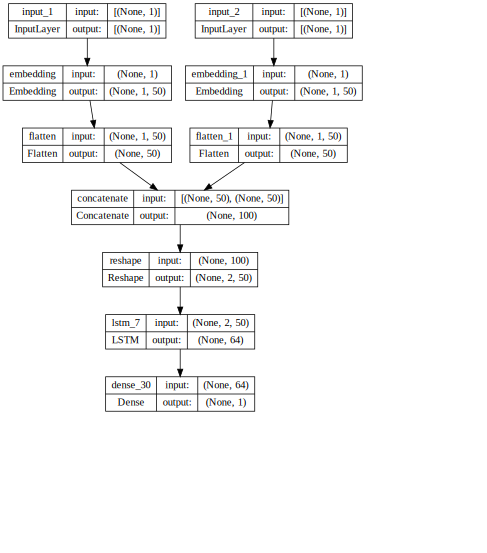

In [ ]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_24 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_22 (Embedding)       (None, 1, 50)        33600       ['input_23[0][0]']               
                                                                                                  
 embedding_23 (Embedding)       (None, 1, 50)        8197500     ['input_24[0][0]']               
                                                                                           